In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,83c20b83-7881-499d-a40d-cc06b65869f8,0,0.393006,2.191800e-07,0.622241,0.000231,98.333400,4.278190e-07,0.651150,sad
1,83c20b83-7881-499d-a40d-cc06b65869f8,1,0.099217,2.922750e-02,1.279490,97.453700,0.837835,2.791860e-03,0.297701,happy
2,83c20b83-7881-499d-a40d-cc06b65869f8,2,0.430551,3.103540e-04,43.123700,0.283289,0.202208,5.554470e+01,0.415176,surprise
3,83c20b83-7881-499d-a40d-cc06b65869f8,3,11.622700,1.721370e-04,8.821420,0.007699,0.813382,6.848630e+00,71.886000,neutral
4,83c20b83-7881-499d-a40d-cc06b65869f8,4,1.428140,2.151490e-03,82.596400,3.834700,0.931493,1.101040e+01,0.196761,fear


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          90 non-null     object 
 1   image_seq         90 non-null     int64  
 2   angry             90 non-null     float64
 3   disgust           90 non-null     float64
 4   fear              90 non-null     float64
 5   happy             90 non-null     float64
 6   sad               90 non-null     float64
 7   surprise          90 non-null     float64
 8   neutral           90 non-null     float64
 9   dominant_emotion  90 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.2+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear         happy        sad  \
count  90.000000  90.000000  9.000000e+01  90.000000  9.000000e+01  90.000000   
mean   45.311111   3.856539  4.845111e-02  36.143804  4.215283e+00  32.656818   
std    26.393157   6.837119  2.822450e-01  29.611261  1.326247e+01  27.452548   
min     0.000000   0.002080  1.680020e-14   0.005674  1.959540e-09   0.150580   
25%    23.250000   0.246497  1.011588e-05  12.486100  8.162750e-03   7.890707   
50%    45.500000   1.197890  3.969240e-04  30.292750  3.268370e-01  26.850100   
75%    67.750000   4.197088  1.341535e-02  65.440375  1.797740e+00  56.829700   
max    90.000000  45.034900  2.656160e+00  99.031300  9.745370e+01  98.333400   

           surprise    neutral  
count  9.000000e+01  90.000000  
mean   4.330881e+00  18.748220  
std    1.180172e+01  26.503800  
min    4.278190e-07   0.008691  
25%    1.008948e-02   1.391075  
50%    1.304275e-01   7.152030  
75%    1.926030e+00  22.284400  
max   

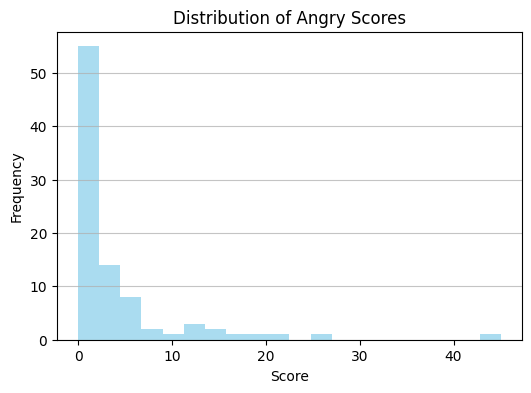

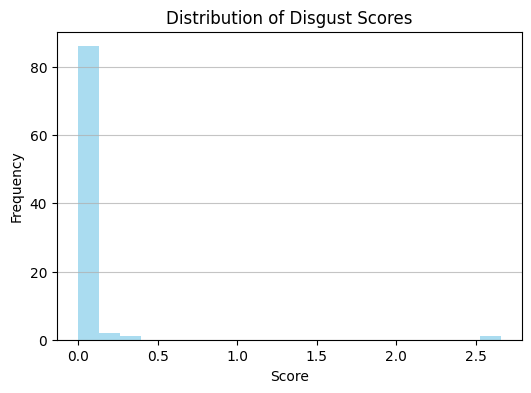

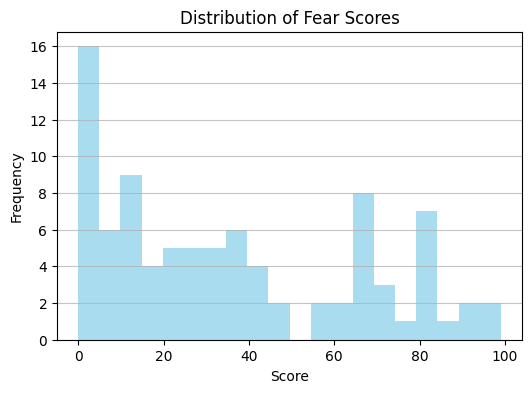

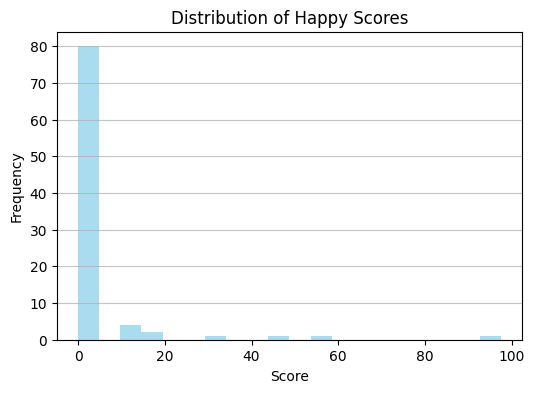

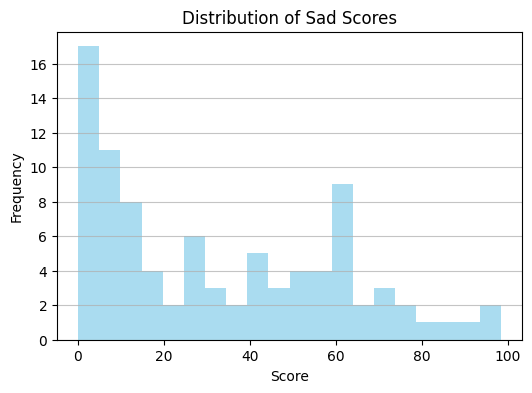

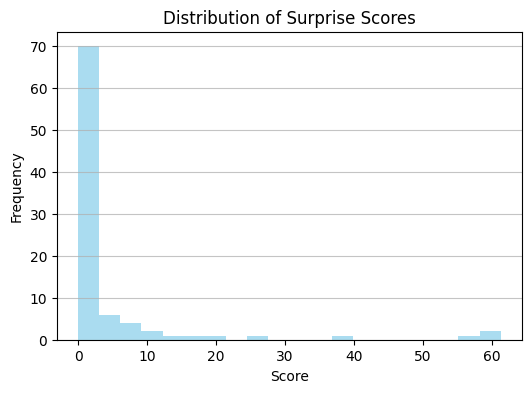

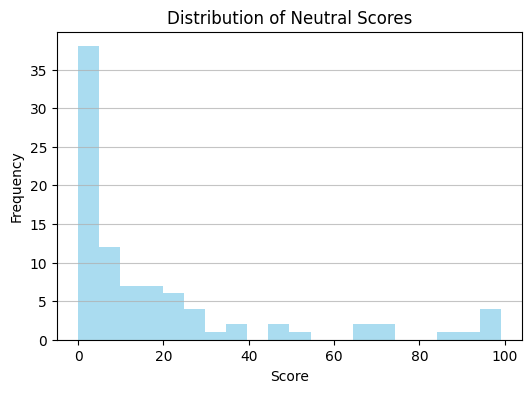

In [5]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

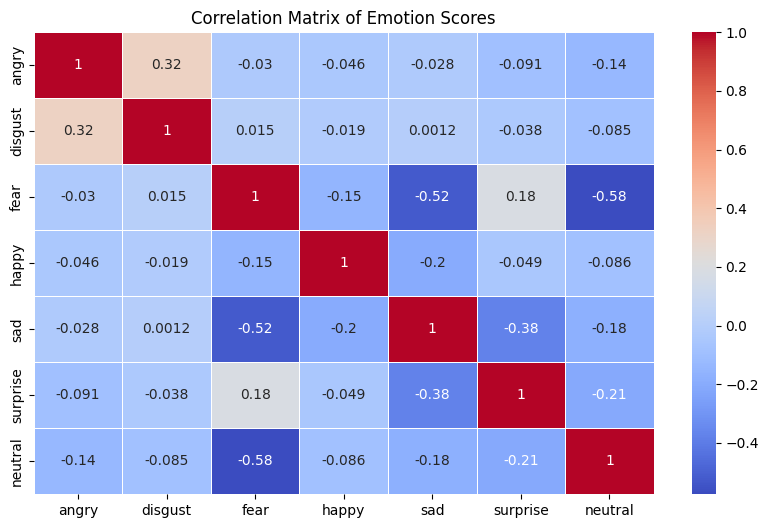

In [6]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

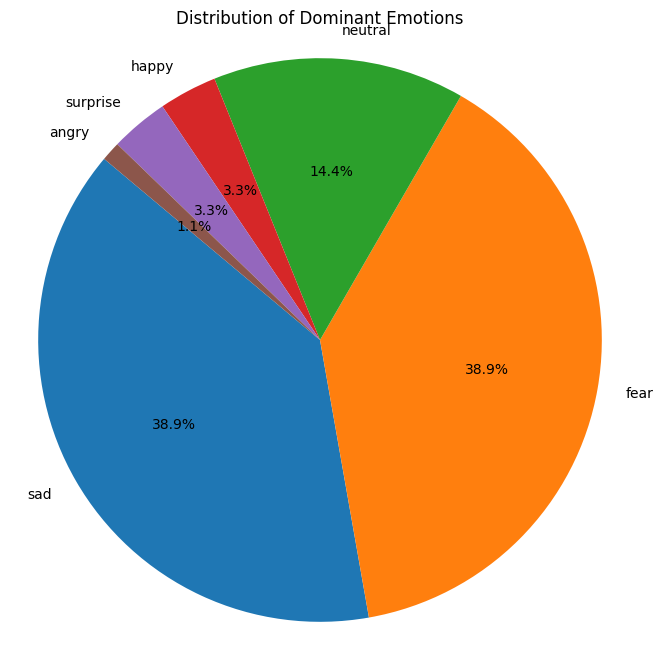

In [7]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [8]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,83c20b83-7881-499d-a40d-cc06b65869f8,1,1,1,5.3099
1,83c20b83-7881-499d-a40d-cc06b65869f8,2,0,1,47.5657
2,83c20b83-7881-499d-a40d-cc06b65869f8,3,1,0,-1.2162
3,83c20b83-7881-499d-a40d-cc06b65869f8,4,1,0,0.6371
4,83c20b83-7881-499d-a40d-cc06b65869f8,5,1,0,1.2903


In [9]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  90.000000  90.000000   90.000000
mean    0.733333   0.166667   11.498590
std     0.444694   0.374766   17.923358
min     0.000000   0.000000  -24.969600
25%     0.000000   0.000000   -0.792775
50%     1.000000   0.000000    4.156950
75%     1.000000   0.000000   28.314000
max     1.000000   1.000000   56.914700


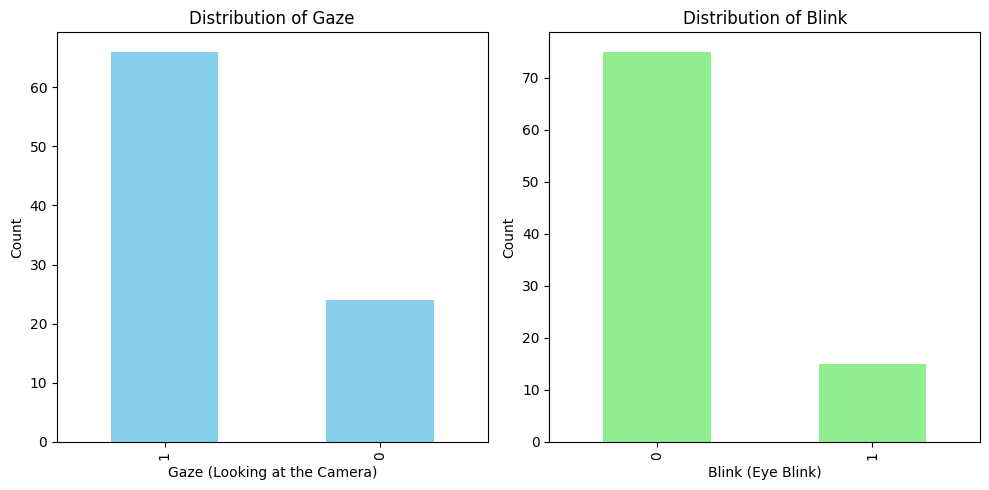

In [10]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

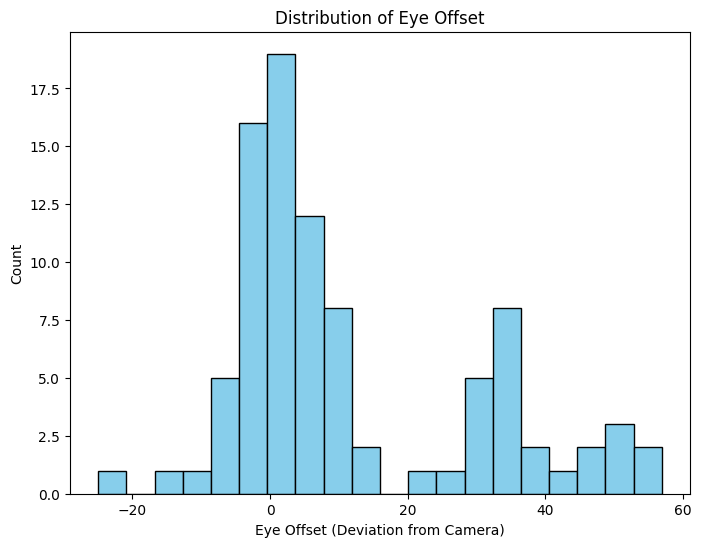

In [11]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [10]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,83c20b83-7881-499d-a40d-cc06b65869f8,0,70a013ed-120a-41fa-bedd-75a5d15afb76,1.0,2023-09-17 07:49:11,0.0
1,83c20b83-7881-499d-a40d-cc06b65869f8,1,70a013ed-120a-41fa-bedd-75a5d15afb76,2.0,2023-09-17 07:49:11,0.0
2,83c20b83-7881-499d-a40d-cc06b65869f8,2,70a013ed-120a-41fa-bedd-75a5d15afb76,3.0,2023-09-17 07:49:11,0.0
3,83c20b83-7881-499d-a40d-cc06b65869f8,3,70a013ed-120a-41fa-bedd-75a5d15afb76,4.0,2023-09-17 07:49:11,0.0
4,83c20b83-7881-499d-a40d-cc06b65869f8,4,70a013ed-120a-41fa-bedd-75a5d15afb76,5.0,2023-09-17 07:49:11,0.0


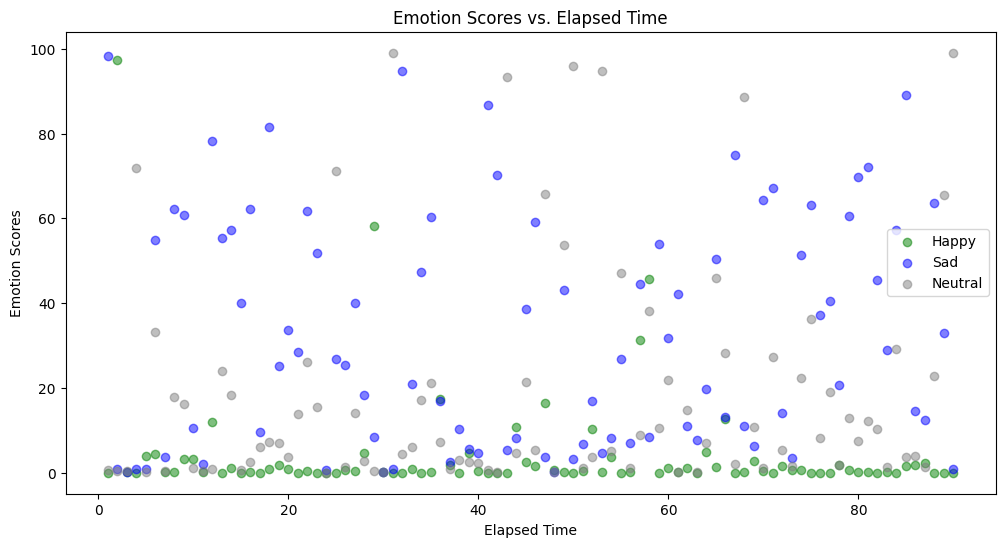

In [11]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [12]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

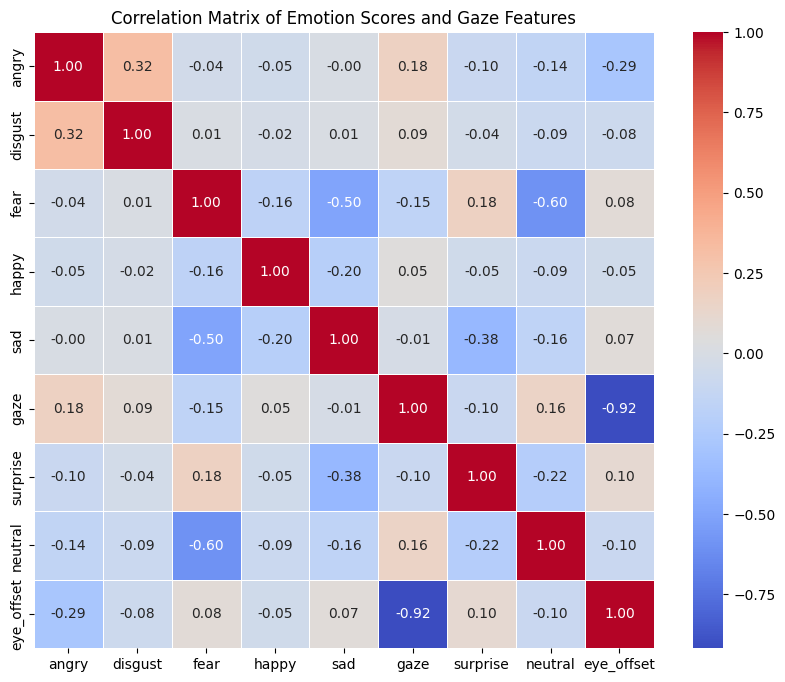

In [15]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad','gaze', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [13]:
transcript_scores_df = pd.read_csv("10.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,6.04,"My name is Michael Ramos, I am from Patna, Bi...","[50364, 1222, 1315, 307, 49328, 2786, 11, 286,...",0.0,-0.331398,1.622711,0.543254,0.457349,0.206400,0.336251,0.888680,0.881647,0.705780,0.623946,2.980132
1,1,0,6.04,12.08,I went up to do my graduation in B.Com Honour...,"[50666, 286, 1437, 493, 281, 360, 452, 15652, ...",0.0,-0.331398,1.622711,0.543254,0.532671,0.222764,0.244564,0.732424,0.750270,0.620743,0.367078,2.814570
2,2,0,12.08,16.68,as well as a Tax Associate wherein I got the ...,"[50968, 382, 731, 382, 257, 23263, 28520, 4353...",0.0,-0.331398,1.622711,0.543254,0.714758,0.117540,0.167701,0.764776,0.384795,0.388321,0.316069,4.130435
3,3,0,16.68,22.56,learned in my B.Com to apply them in real lif...,"[51198, 3264, 294, 452, 363, 13, 14627, 281, 3...",0.0,-0.331398,1.622711,0.543254,0.606619,0.132189,0.261192,0.829503,0.472637,0.776919,0.383717,2.721088
4,4,0,22.56,26.76,been involved in a lot of extracurricular act...,"[51492, 668, 3288, 294, 257, 688, 295, 1279, 1...",0.0,-0.331398,1.622711,0.543254,0.629161,0.139293,0.231547,0.732535,0.387367,0.098993,0.349005,3.571429


In [14]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.589267   0.220948   0.189785   0.619852   0.520637   0.385655   
std     0.217395   0.199494   0.086000   0.252520   0.236410   0.239241   
min     0.042917   0.013739   0.023242   0.127398   0.100494   0.020206   
25%     0.457349   0.094716   0.163491   0.455449   0.384795   0.221028   
50%     0.594038   0.206400   0.199470   0.732424   0.450221   0.388321   
75%     0.737435   0.259974   0.243070   0.821343   0.750270   0.604331   
max     0.963019   0.879557   0.336251   0.888680   0.881647   0.776919   

       enthusiastic  speech_speed  
count     17.000000     17.000000  
mean       0.325507      3.248518  
std        0.154096      0.539271  
min        0.104140      2.571429  
25%        0.239480      2.814570  
50%        0.282800      3.169014  
75%        0.383717      3.543307  
max        0.623946      4.375000  


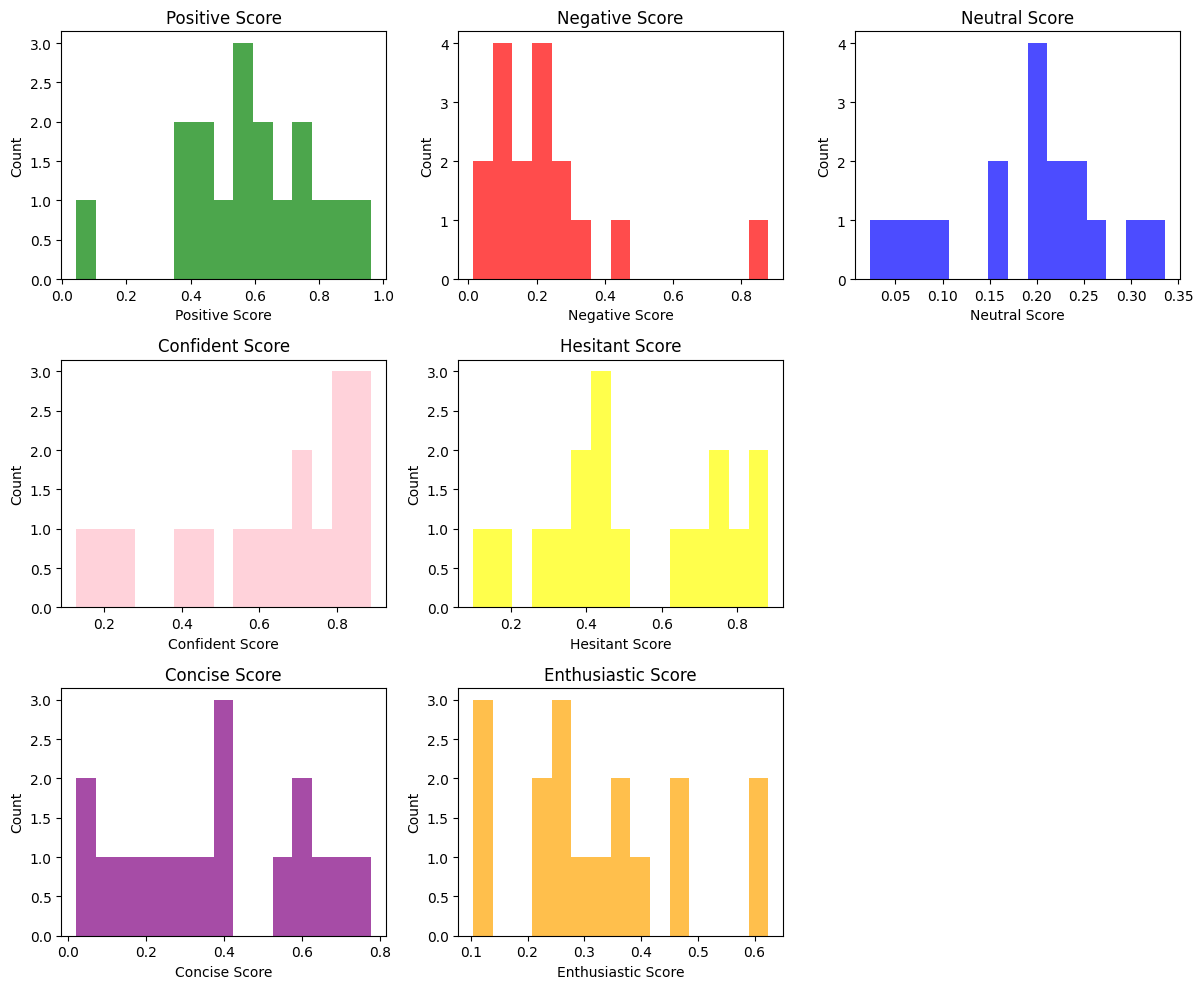

In [15]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

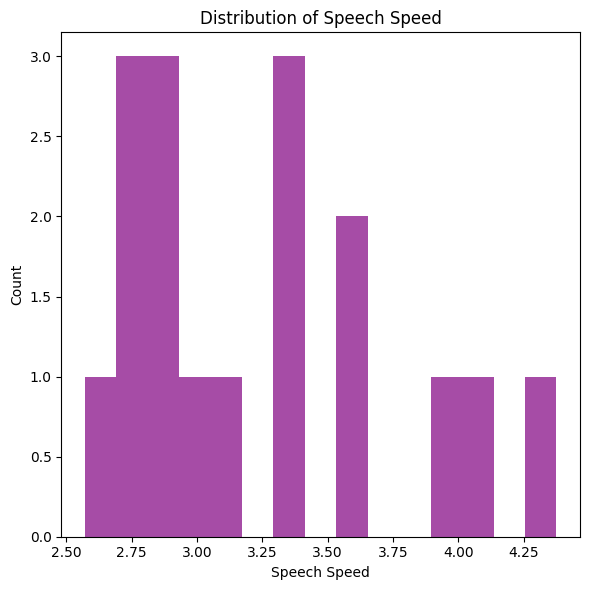

In [16]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

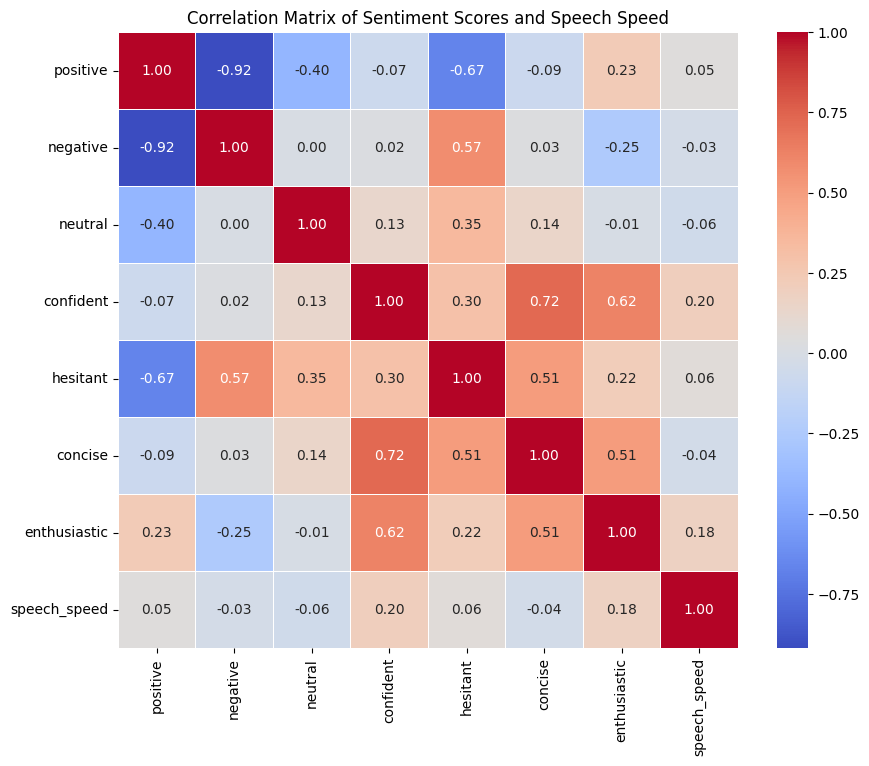

In [17]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

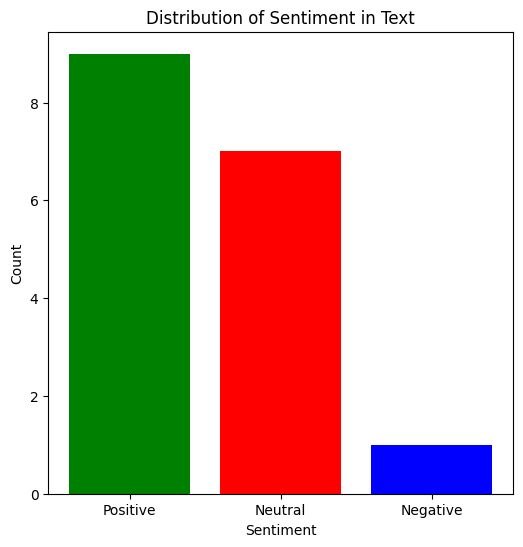

In [18]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [19]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    My name is Michael Ramos, I am from Patna, Bi...        confident
1    I went up to do my graduation in B.Com Honour...         hesitant
2    as well as a Tax Associate wherein I got the ...        confident
3    learned in my B.Com to apply them in real lif...        confident
4    been involved in a lot of extracurricular act...        confident
5    committee in my final school year and was als...        confident
6    end of the year. When I went up to college, I...         hesitant
7    is the part of the students committee. Apart ...         negative
8    and Guide for more than 5 years where I have ...        confident
9    lot of activities that were based for social ...         positive
10   I like to read both fiction and non-fiction b...         positive
11   or if I want to gain some info. The short ter...         hesitant
12   can apply the skill set and the knowledge tha...        confident
13   a

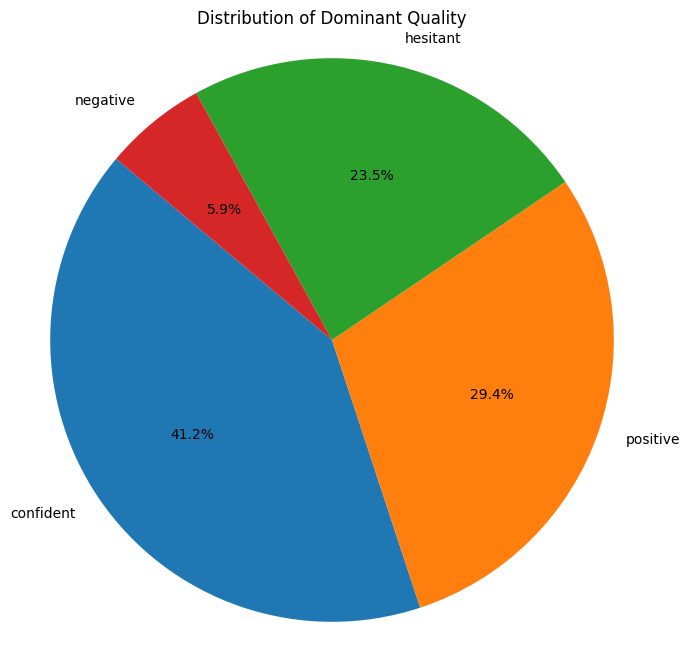

In [20]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Quality')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [21]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'sad': 0.3888888888888889,
 'fear': 0.3888888888888889,
 'neutral': 0.14444444444444443,
 'happy': 0.03333333333333333,
 'surprise': 0.03333333333333333,
 'angry': 0.011111111111111112}

In [22]:
emotion_percentage_dict['disgust']=0

In [23]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [24]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: -23.80569986174959


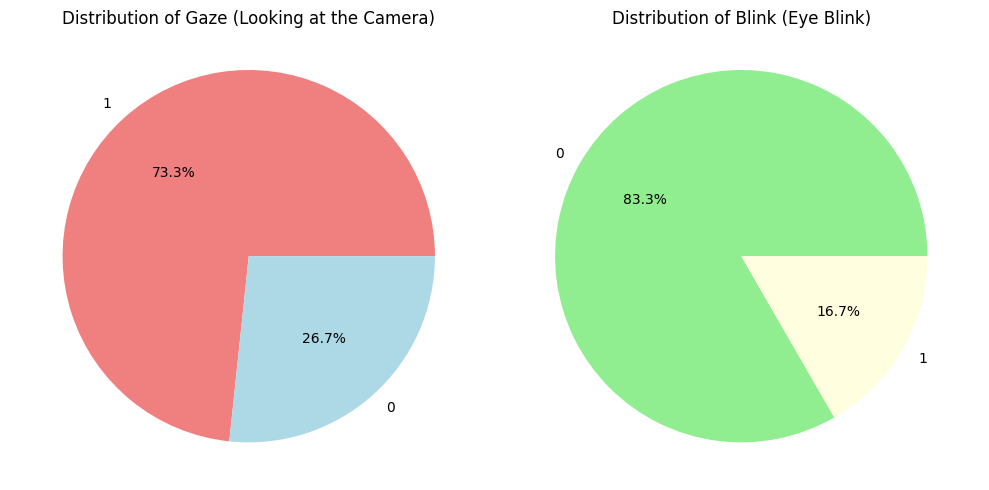

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [26]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [27]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [28]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.45691774074074076

In [29]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'confident': 0.4117647058823529,
 'positive': 0.29411764705882354,
 'hesitant': 0.23529411764705882,
 'negative': 0.058823529411764705}

In [30]:
sentiment_percentage_dict['enthusiastic']=0
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict

{'confident': 0.4117647058823529,
 'positive': 0.29411764705882354,
 'hesitant': 0.23529411764705882,
 'negative': 0.058823529411764705,
 'enthusiastic': 0,
 'concise': 0,
 'neutral': 0}

In [31]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [32]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.2930474097914607

In [33]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [34]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.5009141371151529


In [35]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

-18.82757281899996